# Throttle application across F1 circuits

This is extrapolating from the speed distribution example notebook.

In [2]:
# Load packages

import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

import fastf1 as ff1

In [3]:
# Define commonly-used variables

year = 2024
ses = 'Q'
colormap = mpl.cm.plasma

In [4]:
# Load session data
def fastest_quali_lap(race, driver):
  session = ff1.get_session(year, race, ses)
  weekend = session.event
  session.load()
  lap = session.laps.pick_drivers(driver).pick_fastest()
  
  return lap.telemetry['Throttle']

season = {}

season['Bahrain'] = fastest_quali_lap('Bahrain', 'VER')
season['Saudi Arabia'] = fastest_quali_lap('Saudi Arabia', 'VER')
season['Australia'] = fastest_quali_lap('Australia', 'VER')
season['Japan'] = fastest_quali_lap('Japan', 'VER')
season['China'] = fastest_quali_lap('China', 'VER')
season['Miami'] = fastest_quali_lap('Miami', 'VER')
season['Imola'] = fastest_quali_lap('Imola', 'VER')
season['Monaco'] = fastest_quali_lap('Monaco', 'LEC')
season['Canada'] = fastest_quali_lap('Canada', 'RUS')
season['Barcelona'] = fastest_quali_lap('Barcelona', 'NOR')
season['Austria'] = fastest_quali_lap('Austria', 'VER')
season['Great Britain'] = fastest_quali_lap('Silverstone', 'RUS')
season['Hungary'] = fastest_quali_lap('Hungary', 'NOR')
season['Belgium'] = fastest_quali_lap('Belgium', 'VER')
season['Netherlands'] = fastest_quali_lap('Netherlands', 'NOR')
season['Italy'] = fastest_quali_lap('Italy', 'NOR')
season['Azerbaijan'] = fastest_quali_lap('Azerbaijan', 'LEC')
season['Singapore'] = fastest_quali_lap('Singapore', 'NOR')
season['United States'] = fastest_quali_lap('United States', 'NOR')
season['Mexico'] = fastest_quali_lap('Mexico', 'SAI')
season['Brazil'] = fastest_quali_lap('Brazil', 'NOR')
season['Las Vegas'] = fastest_quali_lap('Las Vegas', 'RUS')
season['Qatar'] = fastest_quali_lap('Qatar', 'VER')
season['Abu Dhabi'] = fastest_quali_lap('Abu Dhabi', 'NOR')

req         WARNING 	DEFAULT CACHE ENABLED! (4.04 GB) /Users/mjbernha/Library/Caches/fastf1
core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '63', '55', '11', '14', '4', '81', '44', '27', '22', '18', '23', '3', '20', '77', '24', '2', '31', '10']
core           IN

In [5]:
# sorted(season, key=np.mean(season))
np.mean(season['Bahrain'])

np.float64(72.71905553784934)

In [6]:
type(season)

dict

In [7]:
# Prepare data for the rest of the notebook
average_speeds = {race: speeds.mean() for race, speeds in season.items()}
sorted_races = sorted(season.keys(), key=lambda race: average_speeds[race])
sorted_df = pd.DataFrame({race: season[race] for race in sorted_races})

In [8]:
type(sorted_df)

pandas.core.frame.DataFrame

In [9]:
sorted_df

,Brazil,Monaco,Mexico,Singapore,China,Hungary,Belgium,Netherlands,Miami,United States,...,Austria,Imola,Las Vegas,Barcelona,Japan,Qatar,Great Britain,Italy,Australia,Saudi Arabia
2,100.0,99.0,99.0,99.0,100.0,99.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,99.0,100.0,100.0
3,100.0,99.0,99.0,99.0,100.0,99.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,99.0,100.0,100.0
4,100.0,99.0,99.0,100.0,100.0,99.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,99.0,100.0,100.0
5,100.0,99.0,99.0,100.0,100.0,99.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,99.0,100.0,100.0
6,100.0,99.0,100.0,100.0,100.0,99.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,99.0,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
842,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
843,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
844,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
sorted_df['Brazil']

2      100.0
3      100.0
4      100.0
5      100.0
6      100.0
       ...  
841      NaN
842      NaN
843      NaN
844      NaN
845      NaN
Name: Brazil, Length: 844, dtype: float64

In [11]:
# Note: This function sets the "full throttle" percentage at 99%. Poke at the throttle data to see why.
def full_throttle_percentage(race):
  data_size = len(sorted_df[race])
  na_size = sorted_df[race].isna().sum()
  valid_size = data_size - na_size
  full_size = (sorted_df[race] > 98).sum()
  full_size_pctg = full_size / valid_size

  return full_size_pctg


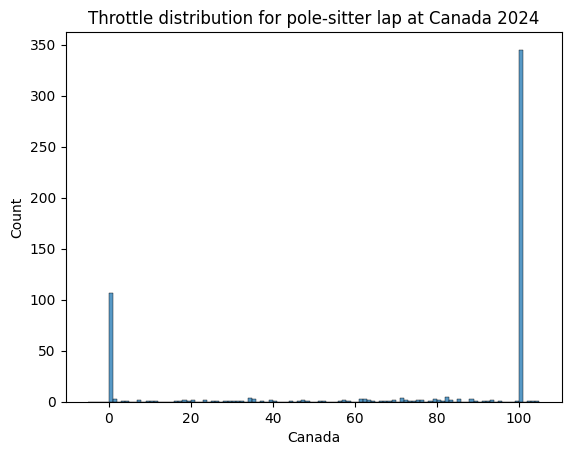

In [17]:
# The histogram of throttle application around Monza should make clear why I set the "full throttle" threshold at 99%.
sns.histplot(
  sorted_df['Canada'],
  bins=110,
  binrange=(-5,105)
)
plt.title('Throttle distribution for pole-sitter lap at Canada 2024')
plt.show()

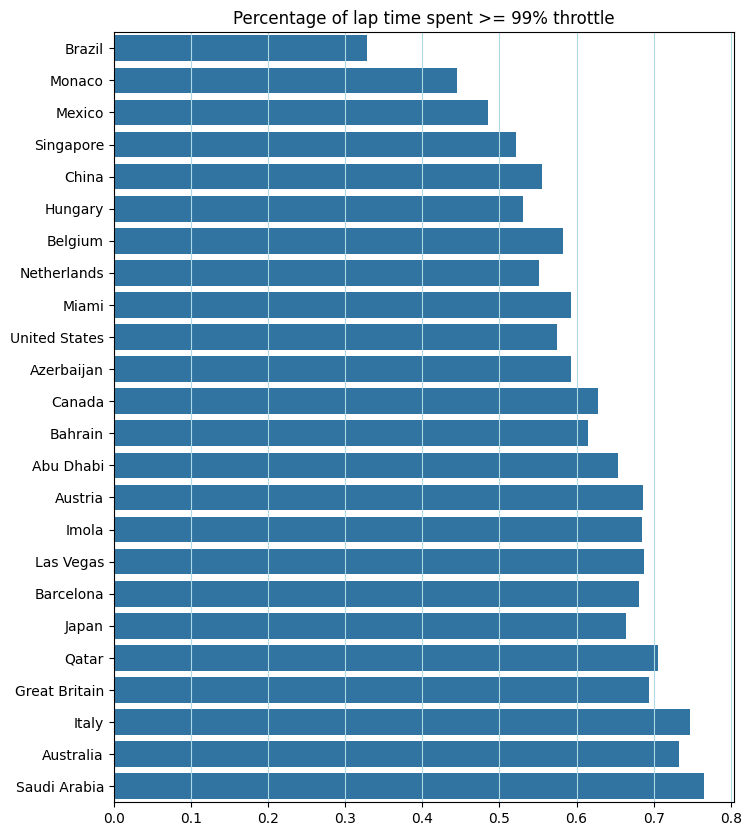

In [15]:
bar_data = {}
for i, race in enumerate(sorted_races):
  bar_data[race] = full_throttle_percentage(race)

fig, ax1 = plt.subplots(1, 1, figsize=(8, 10))

sns.barplot(
  data=bar_data,
  orient='h',
  ax=ax1
)
ax1.grid(color='lightblue', which='major', axis='x')
ax1.set_title("Percentage of lap time spent >= 99% throttle")
plt.show()

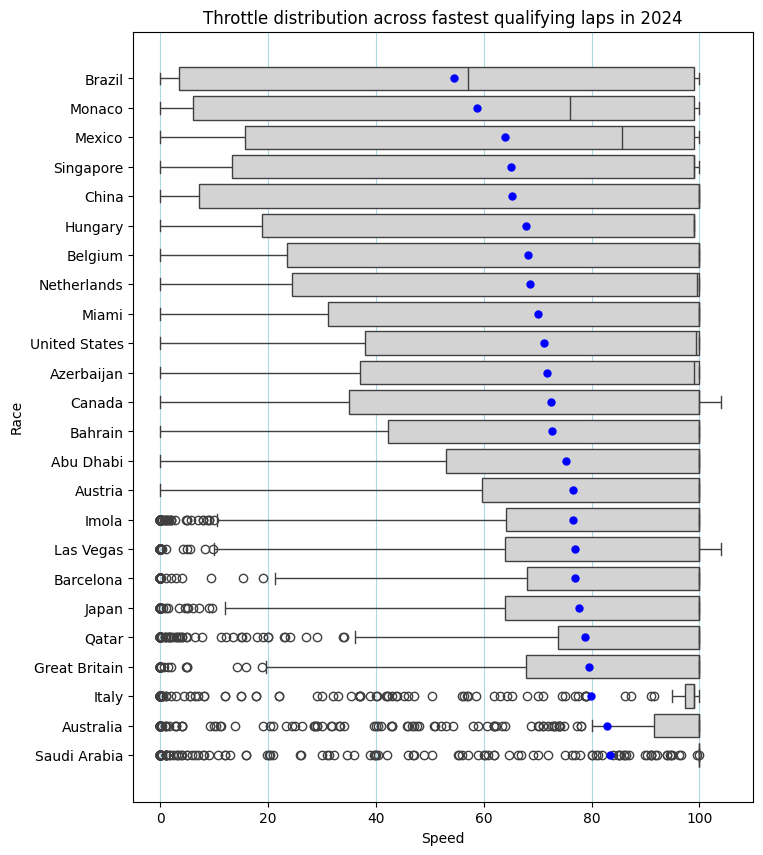

In [13]:
fig, ax1 = plt.subplots(1, 1, figsize=(8, 10))

sns.boxplot(
  data=sorted_df,
  orient="h",
  ax=ax1,
  color="lightgray"
)

ax1.set_title('Throttle distribution across fastest qualifying laps in 2024')
ax1.set_xlim((-5, 110))
ax1.grid(color='lightblue', which='major', axis='x')
ax1.set_xlabel('Speed')
ax1.set_ylabel('Race')

for i, race in enumerate(sorted_races):
  mean_speed = average_speeds[race]
  ax1.plot(mean_speed, i, 'bo', markersize=5)
plt.show()

/Users/mjbernha/git/f1-notebooks/.venv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 43.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/mjbernha/git/f1-notebooks/.venv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 53.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/mjbernha/git/f1-notebooks/.venv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 49.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/mjbernha/git/f1-notebooks/.venv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 59.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Use

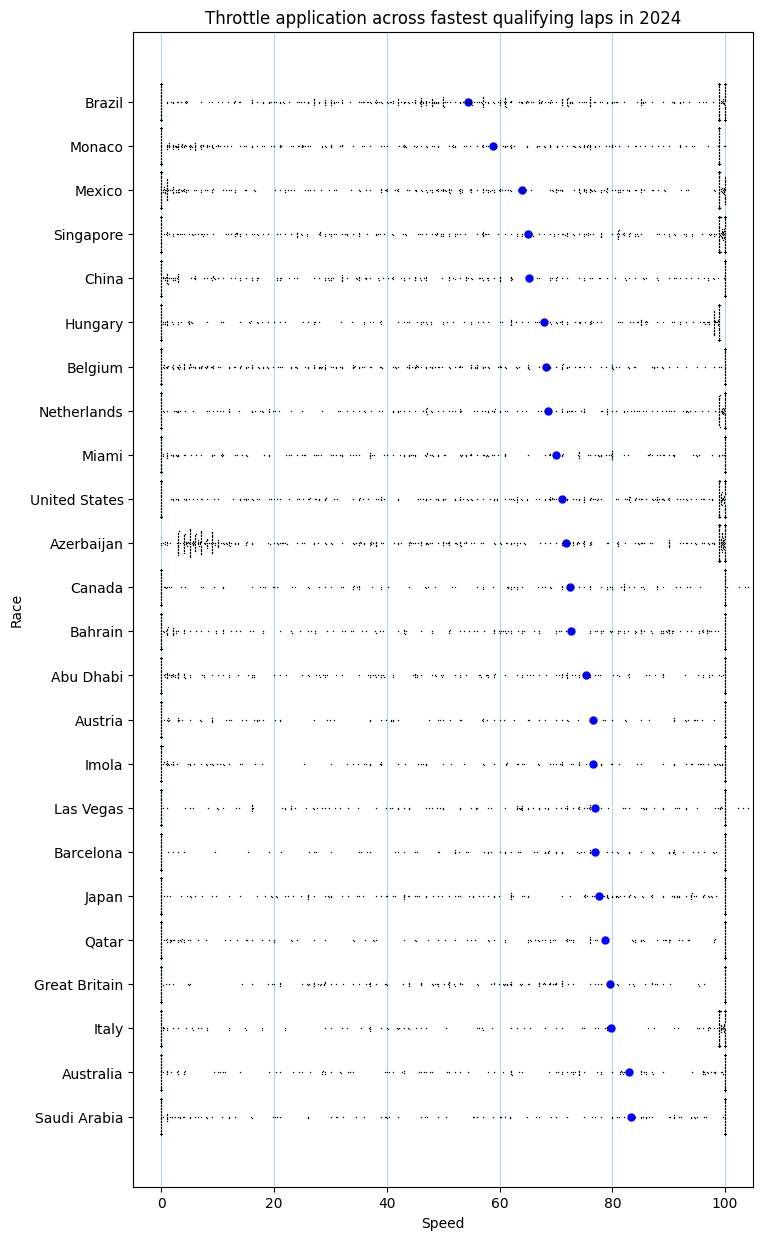

In [14]:
fig, ax1 = plt.subplots(1, 1, figsize=(8, 15))

sns.swarmplot(
  data=sorted_df,
  orient="h",
  ax=ax1,
  color="black",
  size=1
)

ax1.set_title('Throttle application across fastest qualifying laps in 2024')
ax1.set_xlim((-5, 105))
ax1.grid(color='lightblue', which='major', axis='x')
ax1.set_xlabel('Speed')
ax1.set_ylabel('Race')

for i, race in enumerate(sorted_races):
  mean_speed = average_speeds[race]
  ax1.plot(mean_speed, i, 'bo', markersize=5)
plt.show()

---

This is the end of the notebook.